# Lab 3: Titanic Survival Prediction

**Author:** Justin Schroder

**Date:** 3/24/2025

**Objective:** 

* Build models to predict Titanic survival based on various features.\
* Evaluate the performance of different models (Decision Tree, Neural Network, SVM).
* Analyze the impact of different features on model accuracy.
* Address data issues, such as missing values and irrelevant features.
* Experiment with hyperparameter tuning to improve model performance.
* Use metrics like confusion matrix and classification report for evaluation.

## Introduction

This project aims to predict Titanic survival using machine learning models. By analyzing features such as alone, age, and family size, different models like Decision Tree, Neural Network, and SVM will be evaluated to determine the best approach for predicting survival.

---


## Section 1. Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook.  

### 1.1 Imports

In [788]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### 1.2 Load the dataset

In [789]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

--- 

## Section 2: Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data
* Fill missing values in age using the median.
* Fill missing values in embark_town using the mode.

In [790]:
# Handle missing values without inplace modification
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering
* Create family_size (sum of siblings/spouses and parents/children).
* Convert categorical sex to numeric (0: male, 1: female).
* Convert embarked to numeric (C: 0, Q: 1, S: 2).
* Convert alone to binary (0 or 1).

In [791]:
# Feature engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

--- 

## Section 3: Feature Selection and Justification
* Case 1:
  * Input features: alone
  * Target: survived

* Case 2:
  * Input features: age 
  * Target: survived

* Case 3:
  * Input features: age and family_size 
  * Target: survived

In [792]:
# Case 1: alone only
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: age only (or your choice)
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size (or your choice)
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']


### Reflection 3:
* Why are these features selected?
  * Alone might be predictive because passengers who traveled alone may have a different survival rate compared to those with family members.
  * Age could be relevant since children and elderly passengers might have had higher survival rates.
  * Family size could also affect survival, as larger family groups might have different survival chances compared to smaller groups or individuals.
* Are there features that are likely to be highly predictive of survival?
  * Variables such as age, sex, class, and family size are generally predictive, as these have been shown to impact survival rates. Sex, for instance, might be especially predictive, as women and children were often prioritized for lifeboats.

--- 

## Section 4: Train a Classification Model for Case 1
### 4.1 Split the Data

In [793]:
from sklearn.model_selection import StratifiedShuffleSplit

# Case 1: Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X1, y1):
    X1_train = X1.iloc[train_indices]
    X1_test = X1.iloc[test_indices]
    y1_train = y1.iloc[train_indices]
    y1_test = y1.iloc[test_indices]

    print('Train size (Case 1): ', len(X1_train), 'Test size: ', len(X1_test))

Train size (Case 1):  712 Test size:  179



### 4.2 Create and Train Model (Decision Tree)

In [794]:
from sklearn.tree import DecisionTreeClassifier

# Case 1: Train Decision Tree
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

In [795]:
from sklearn.metrics import classification_report

# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree (Case 1) on training data:")
print(classification_report(y1_train, y1_pred))

Results for Decision Tree (Case 1) on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



In [796]:
# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree (Case 1) on test data:")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree (Case 1) on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Heatmap Report Confusion Matrix 

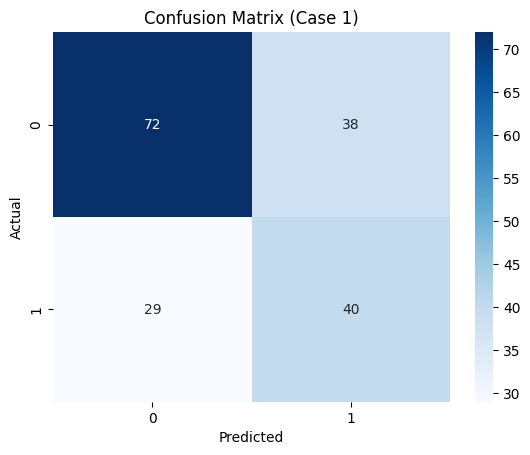

In [797]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Case 1: Confusion Matrix
cm1 = confusion_matrix(y1_test, y1_test_pred)
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix (Case 1)")
plt.show()

### 4.5 Report Decision Tree Plot

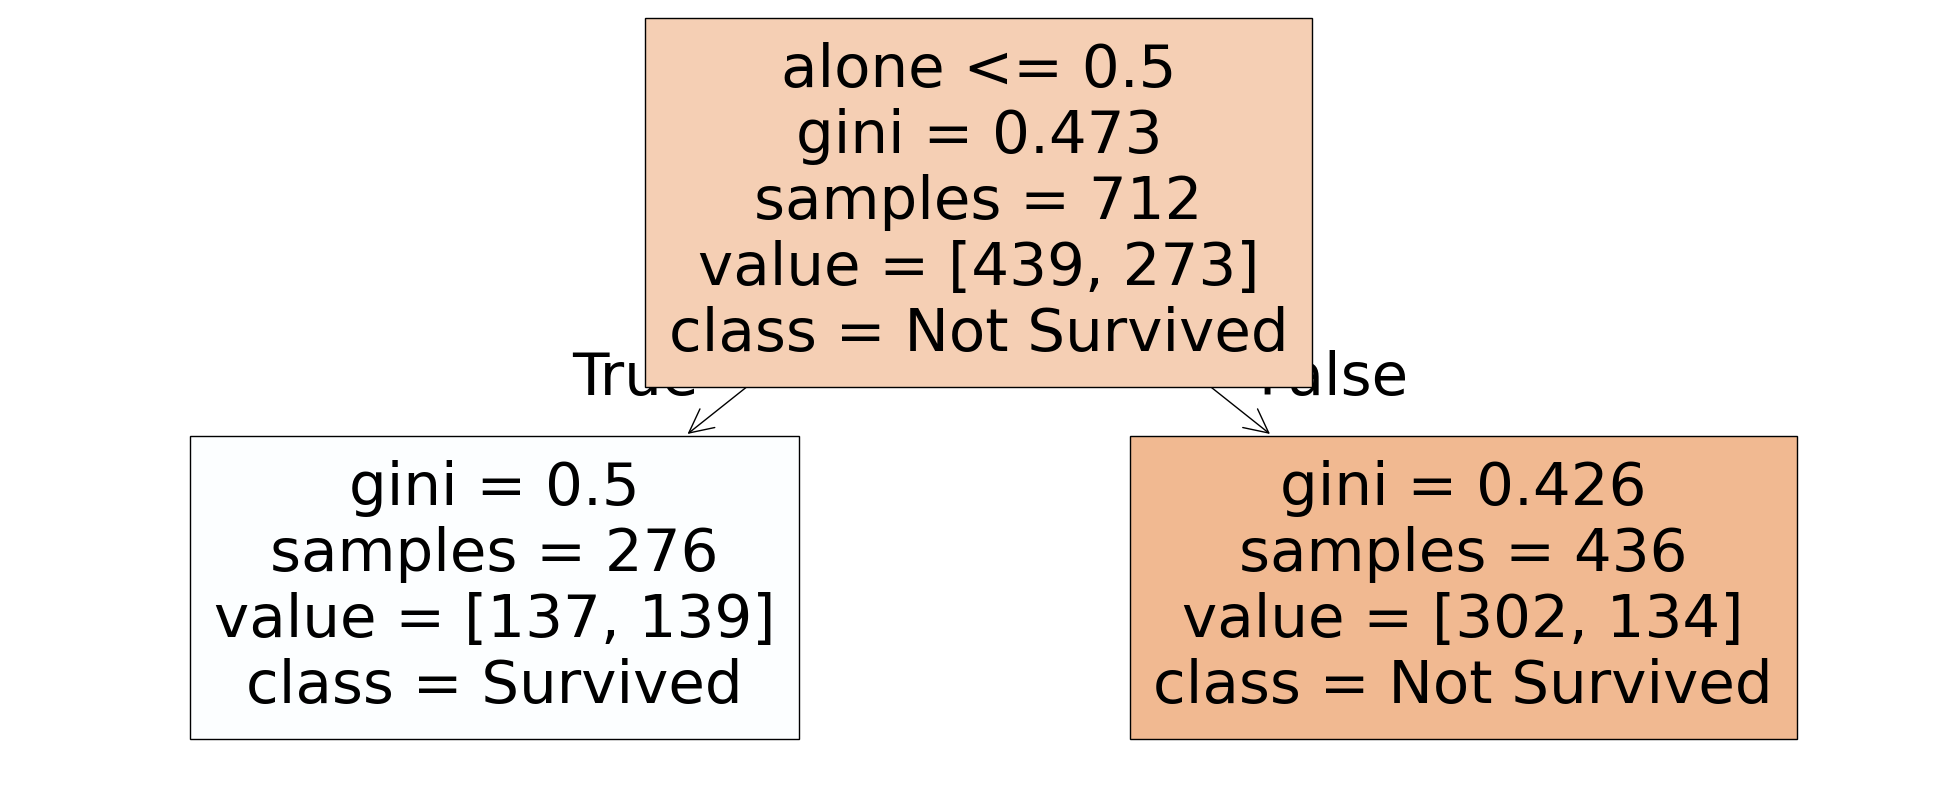

In [798]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Case 1: Plot Decision Tree
fig1 = plt.figure(figsize=(25,10))
plot_tree(tree_model1, feature_names=X1.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig1.savefig("decision_tree_titanic_case1.png")

### Section 4: Train a Classification Model for Case 2
Repeat each step for Case 2

In [799]:
# Case 2: Split
for train_indices, test_indices in splitter.split(X2, y2):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

    print('Train size (Case 2): ', len(X2_train), 'Test size: ', len(X2_test))

Train size (Case 2):  712 Test size:  179


In [800]:
# Case 2: Train Decision Tree
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [801]:
# Case 2: Evaluate Decision Tree on Training and Test Data
y2_pred = tree_model2.predict(X2_train)
y2_test_pred = tree_model2.predict(X2_test)

print("Results for Decision Tree (Case 2) on training data:")
print(classification_report(y2_train, y2_pred))

print("Results for Decision Tree (Case 2) on test data:")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree (Case 2) on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree (Case 2) on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



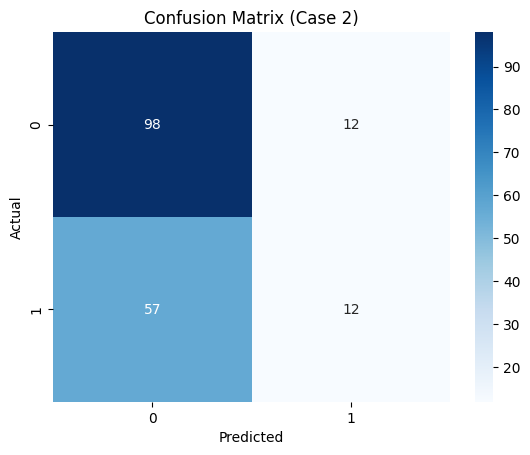

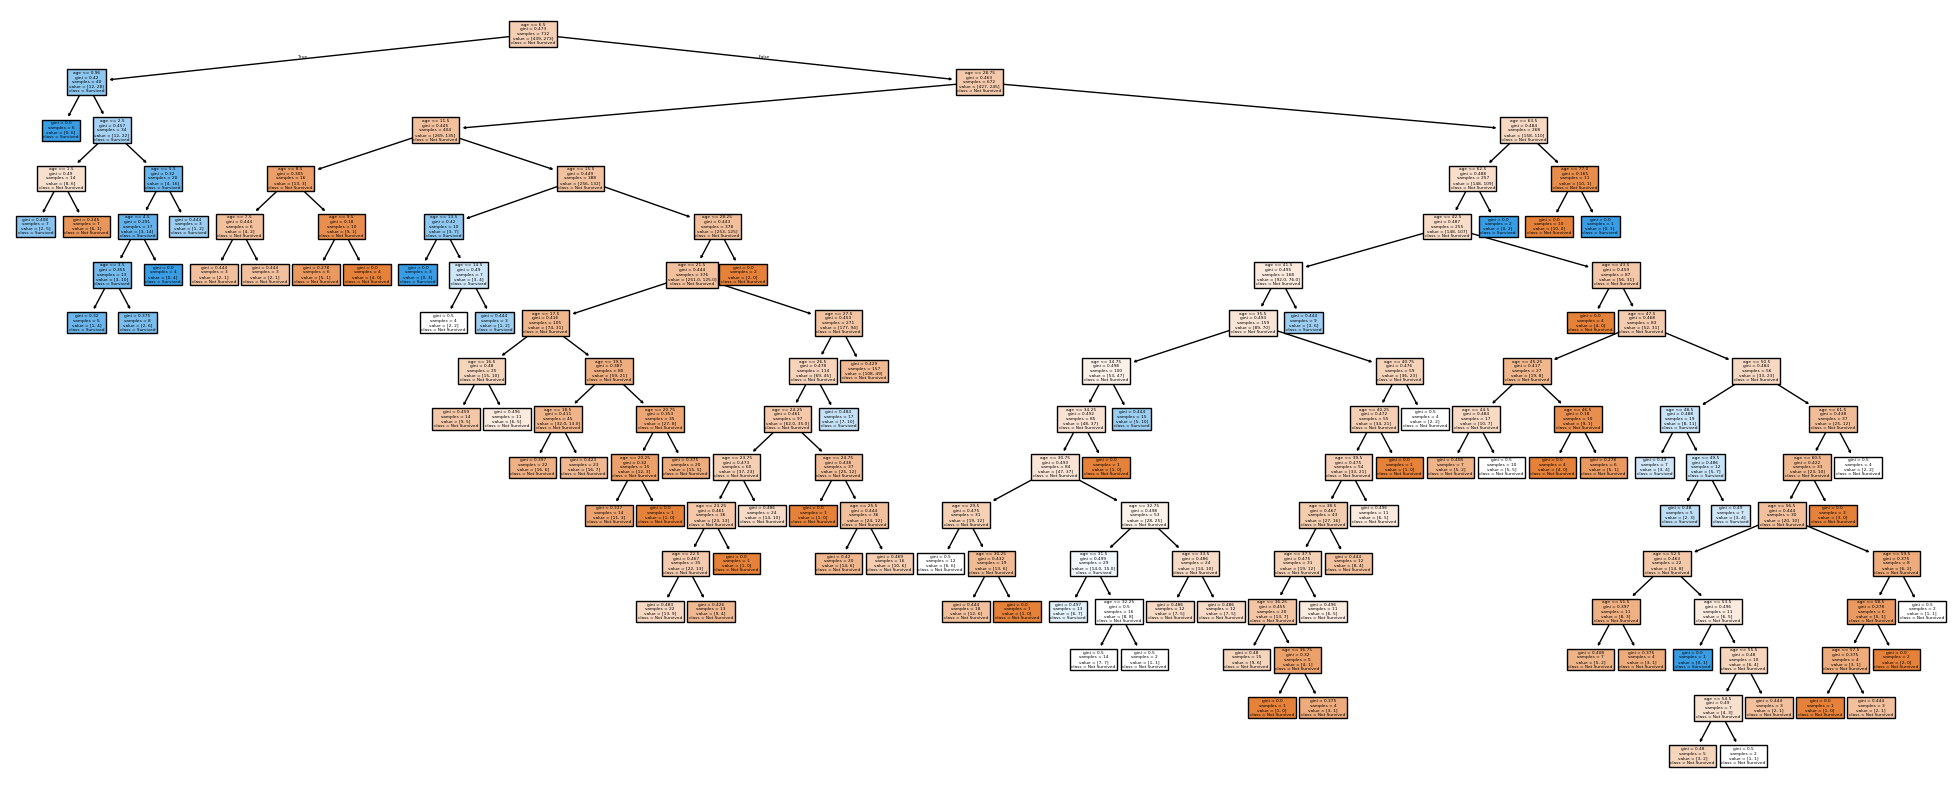

In [802]:
# Case 2: Confusion Matrix
cm2 = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix (Case 2)")
plt.show()

# Case 2: Plot Decision Tree
fig2 = plt.figure(figsize=(25,10))
plot_tree(tree_model2, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig2.savefig("decision_tree_titanic_case2.png")

### Section 4: Train a Classification Model for Case 3
Repeat each step for Case 3

In [803]:
# Case 3: Split
for train_indices, test_indices in splitter.split(X3, y3):
    X3_train = X3.iloc[train_indices]
    X3_test = X3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

    print('Train size (Case 3): ', len(X3_train), 'Test size: ', len(X3_test))

Train size (Case 3):  712 Test size:  179


In [804]:
# Case 3: Train Decision Tree
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

DecisionTreeClassifier()

In [805]:
# Case 3: Evaluate Decision Tree on Training and Test Data
y3_pred = tree_model3.predict(X3_train)
y3_test_pred = tree_model3.predict(X3_test)

print("Results for Decision Tree (Case 3) on training data:")
print(classification_report(y3_train, y3_pred))

print("Results for Decision Tree (Case 3) on test data:")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree (Case 3) on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree (Case 3) on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



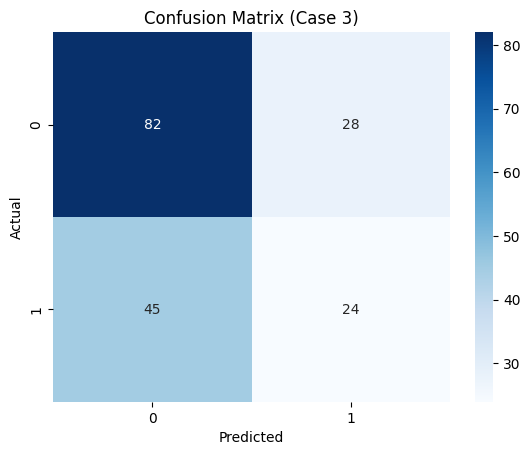

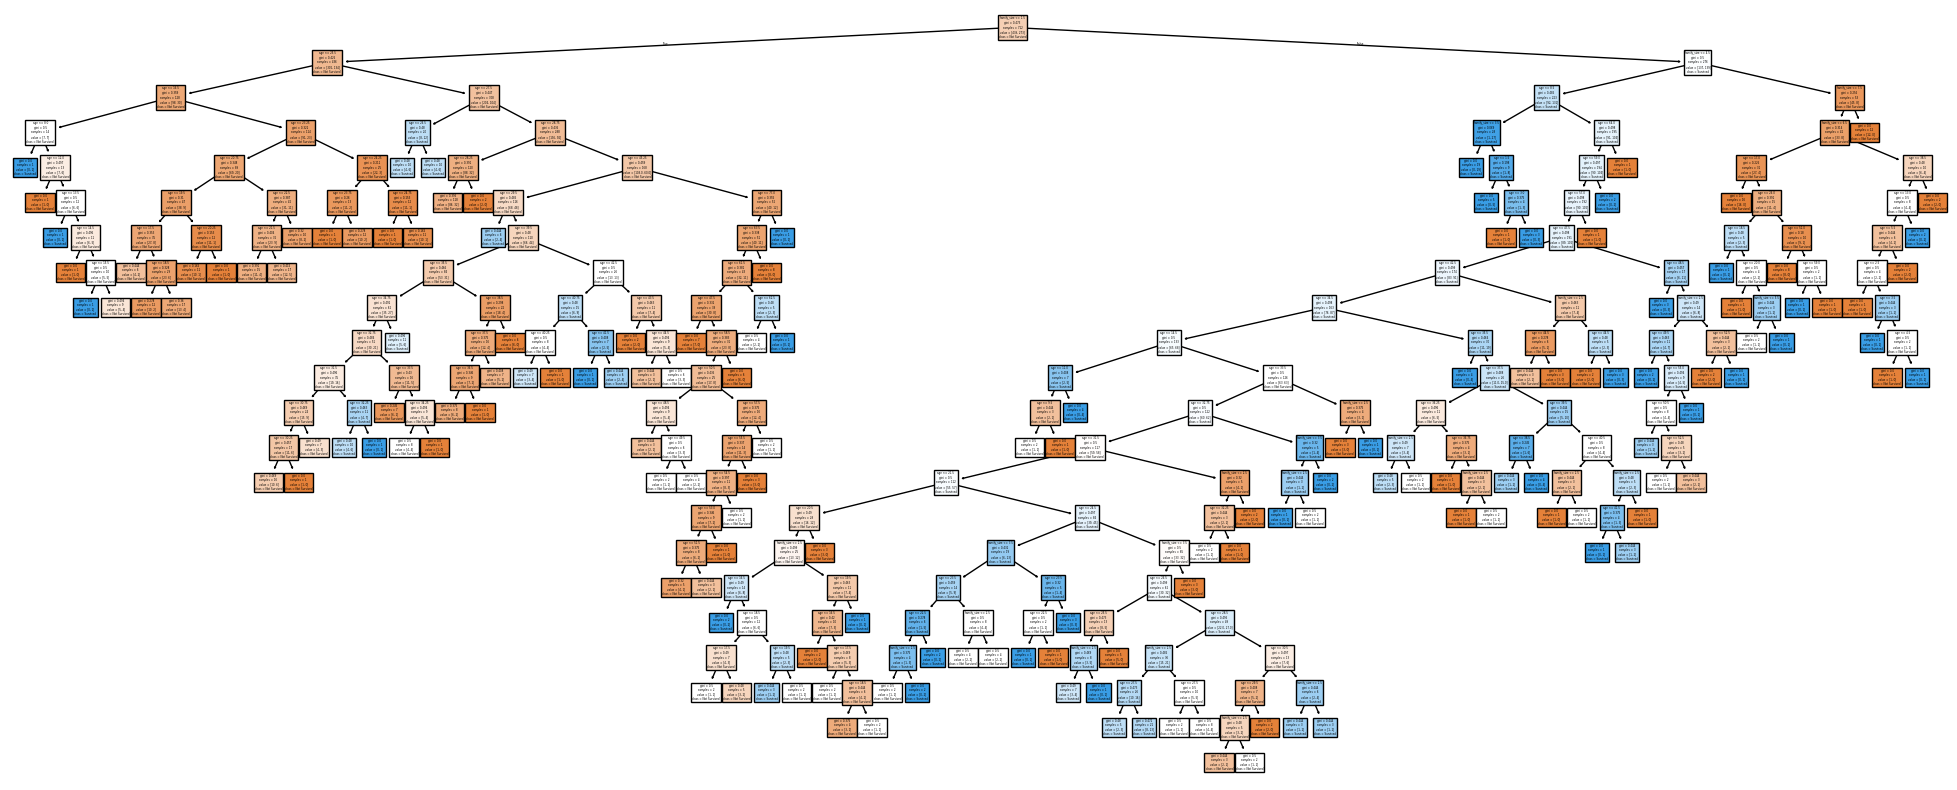

In [806]:
# Case 3: Confusion Matrix
cm3 = confusion_matrix(y3_test, y3_test_pred)
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix (Case 3)")
plt.show()

# Case 3: Plot Decision Tree
fig3 = plt.figure(figsize=(25,10))
plot_tree(tree_model3, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig3.savefig("decision_tree_titanic_case3.png")

### Reflection 4:
* How well did the different cases perform?
  * Case 1 had moderate performance with around 62-63% accuracy.
  * Case 2 showed an improvement in training accuracy (68%) but struggled with survivors.
  * Case 3 had the highest training accuracy (77%) but suffered from overfitting, resulting in a lower test accuracy (59%).
* Are there any surprising results?
  * Even with more features in Case 2 and 3, the models still struggled to predict survivors accurately.
  * Overfitting in Case 3 was surprising, where a more complex model did better on training but worse on the test set.
* Which inputs worked better? 
  * Age (Case 2) gave a more balanced model, with decent performance and a bigger decision tree.
  * Case 3 (age and family size) had the highest training accuracy but didn't perform as well on the test data due to overfitting.

---

## Section 5: Compare Alternative Models (SVC, NN) (For Age)

In a Support Vector Machine (SVM), the choice of kernel determines how the algorithm transforms the data to separate the classes. The kernel function enables the model to map the input data into a higher-dimensional space, helping the algorithm find a suitable decision boundary. If the data isn't easily separable by a straight line or plane, experimenting with different kernels may improve the model's performance.

### 5.1 Train and Evaluate Model (SVC)

In [807]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Define the features and target variable for Case 2 (age only)
X2 = titanic[['age']]
y2 = titanic['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Test 1: RBF Kernel (Radial Basis Function) with class weights
svc_model = SVC(kernel='rbf', class_weight='balanced')
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

print("Results for SVC (RBF Kernel) on test data:")
print(classification_report(y_test, y_pred_svc))

# Test 2: Linear Kernel with class weights
svc_model = SVC(kernel='linear', class_weight='balanced')
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

print("Results for SVC (Linear Kernel) on test data:")
print(classification_report(y_test, y_pred_svc))

# Test 3: Polynomial Kernel with class weights
svc_model_poly = SVC(kernel='poly', degree=3, class_weight='balanced')
svc_model_poly.fit(X_train, y_train)
y_pred_poly = svc_model_poly.predict(X_test)
print("\nResults for SVC (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))

# Test 4: Sigmoid Kernel with class weights
svc_model_sigmoid = SVC(kernel='sigmoid', class_weight='balanced')
svc_model_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svc_model_sigmoid.predict(X_test)
print("\nResults for SVC (Sigmoid Kernel):")
print(classification_report(y_test, y_pred_sigmoid))


Results for SVC (RBF Kernel) on test data:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       157
           1       0.48      0.42      0.45       111

    accuracy                           0.57       268
   macro avg       0.55      0.55      0.55       268
weighted avg       0.56      0.57      0.57       268

Results for SVC (Linear Kernel) on test data:
              precision    recall  f1-score   support

           0       0.59      0.35      0.44       157
           1       0.41      0.65      0.51       111

    accuracy                           0.47       268
   macro avg       0.50      0.50      0.47       268
weighted avg       0.51      0.47      0.47       268


Results for SVC (Polynomial Kernel):
              precision    recall  f1-score   support

           0       0.81      0.08      0.15       157
           1       0.43      0.97      0.60       111

    accuracy                           0.45       268
 

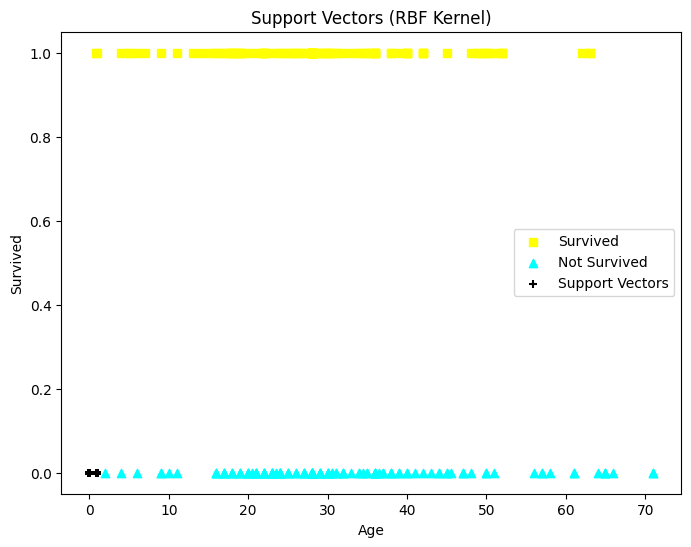

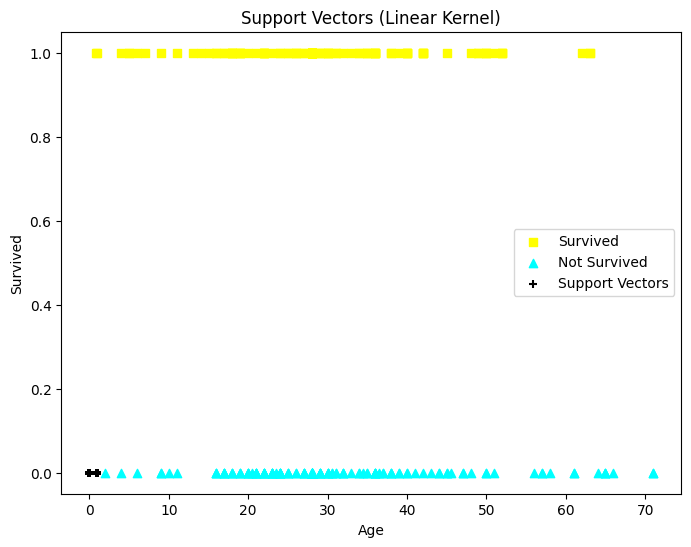

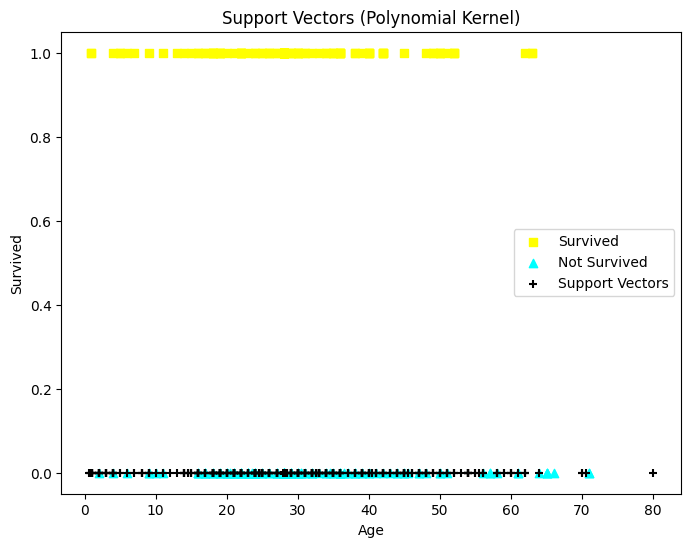

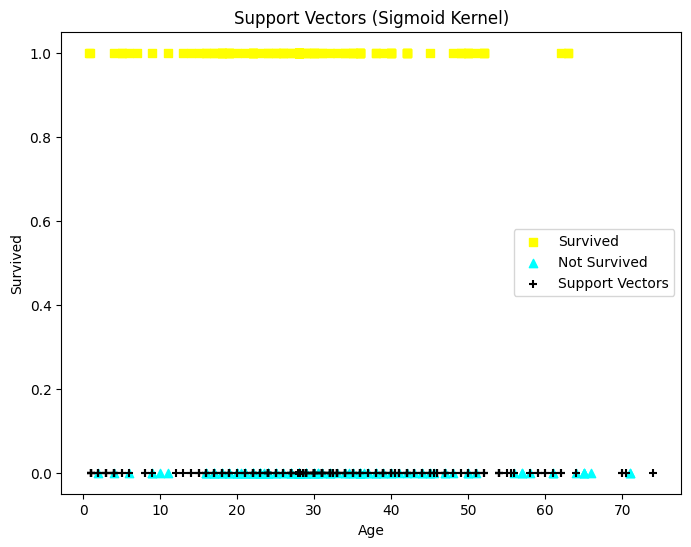

In [808]:
import matplotlib.pyplot as plt

# Helper function to plot support vectors
def plot_support_vectors(svc_model, X_test, y_test, title):
    # Create data for charting
    survived = X_test.loc[y_test == 1]
    not_survived = X_test.loc[y_test == 0]

    plt.figure(figsize=(8, 6))

    # Scatter plot for survived and not survived
    plt.scatter(survived['age'], y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
    plt.scatter(not_survived['age'], y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

    # Add support vectors (if available)
    if hasattr(svc_model, 'support_vectors_'):
        support_x = svc_model.support_vectors_[:, 0]  # First feature ('age')
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

    # Add labels and legend
    plt.xlabel('Age')
    plt.ylabel('Survived')
    plt.legend()
    plt.title(title)
    plt.show()

# Visualize support vectors for each kernel model using 'age' feature
plot_support_vectors(svc_model_rbf, X_test, y_test, 'Support Vectors (RBF Kernel)')
plot_support_vectors(svc_model_linear, X_test, y_test, 'Support Vectors (Linear Kernel)')
plot_support_vectors(svc_model_poly, X_test, y_test, 'Support Vectors (Polynomial Kernel)')
plot_support_vectors(svc_model_sigmoid, X_test, y_test, 'Support Vectors (Sigmoid Kernel)')


### 5.2 Train and Evaluate Model (Neural Network MLP)
The next step involves training a Neural Network model using the Multi-Layer Perceptron (MLPClassifier). The model is configured with 3 hidden layers, with sizes (50, 25, 10), and the 'lbfgs' solver, which is well-suited for small datasets.

The following steps will be performed:
* Train the Neural Network: The model is trained on the provided training data.
* Evaluate the Model: Predictions are made on the test data, and the classification report is displayed.
* Plot the Confusion Matrix: The performance of the model is visualized using a confusion matrix.

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.60      0.97      0.74       157
           1       0.62      0.07      0.13       111

    accuracy                           0.60       268
   macro avg       0.61      0.52      0.43       268
weighted avg       0.60      0.60      0.49       268



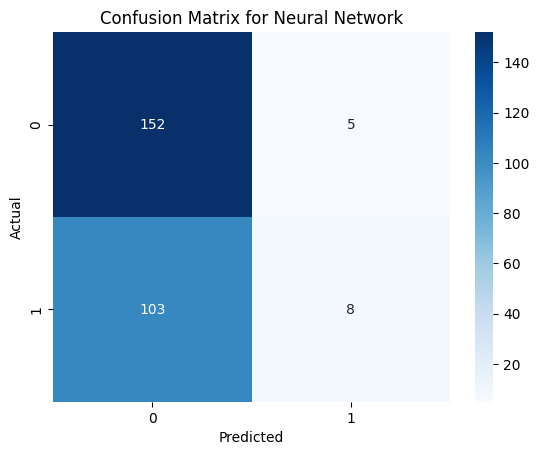

In [809]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Neural Network model with 3 hidden layers (50, 25, 10) and 'lbfgs' solver
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

# Predict and evaluate Neural Network model
y_pred_nn = nn_model.predict(X_test)

# Print classification report
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()

### Reflection 5:
* How well did each model perform?
  * SVC with RBF Kernel: Performed fairly well with 57% accuracy. It balanced precision and recall but had a lower recall for survivors.
  * SVC with Linear Kernel: Had the worst performance at 47% accuracy, with low recall for survivors.
  * SVC with Polynomial Kernel: Scored 45% accuracy, with high recall for survivors but low precision for not survived, leading to poor performance overall.
  * SVC with Sigmoid Kernel: Achieved 53% accuracy, with a balanced but modest performance for both classes.
  * Neural Network (MLPClassifier): Scored 60% accuracy, with decent performance, but low recall for survivors.
* Are there any surprising results?
  * The Polynomial Kernel SVC had poor overall performance despite high recall for survivors.
  * The Linear Kernel SVC performed worse than expected due to its inability to handle complex patterns in the data.
* Why might one model outperform the others?
  * The RBF Kernel SVC likely outperformed others due to its ability to handle non-linear relationships.
  * The Neural Network did okay but struggled with class imbalance, affecting its recall for survivors.
  * The Linear and Polynomial SVC models underperformed due to their inability to capture complex patterns, either being too simple (linear) or overfitting (polynomial).

--- 

## Section 6 

### 6.1 Summarize Findings

* Age and family size were good predictors of survival. The Decision Tree model worked well but overfitted the training data. The Neural Network performed slightly better but was more complex. The SVM with RBF kernel did well, while other kernels weren’t as effective.

### 6.2 Discuss Challenges Faced

* Small Sample Size: Some features, like “alone,” didn’t help much. The small dataset made it harder to generalize results. There were some missing values that needed cleaning.
* Missing Values: Any missing data could potentially bias the model’s performance and predictions.

### 6.3 Next Steps
* Experiment with features like pclass, fare, embarked, or deck to improve model performance. These could offer more relevant information for survival prediction. Also, adjust hyperparameters to fine-tune the models and improve accuracy. Testing the models on a larger dataset or using techniques like cross-validation could provide more reliable results.

---